# Bike Sharing Data
## Aim:
Perform exploratory data analysis on a bike sharing dataset prepared by Hadi Fanaee-T with original data obtained from: http://capitalbikeshare.com/system-data.

### Objectives:
- Explore the dataset
- Create a model for predicting ride counts
- Create a model for predicting weather anomalies

In [2]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)

Importing the 'Hours' dataset.

In [3]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Importing 'Days' dataset.

In [4]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Data Cleaning
Checking for nulls and missing values

In [5]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Data Visualizations
Analyzing the data.

In [9]:
import seaborn as sns
sns.set(style="whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

Rides in 2011 (0) compared with 2012 (1)

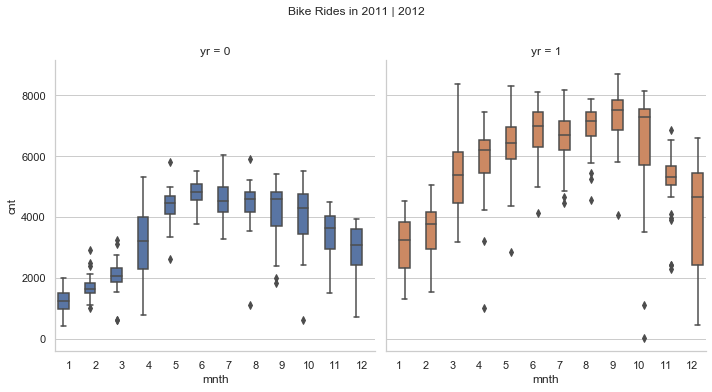

In [10]:
g = sns.catplot(x="mnth", y="cnt", col="yr", data=df_day, legend=True, hue='yr', kind='box')
_ = g.fig.suptitle("Bike Rides in 2011 | 2012", y=1.08)

A surge in the peak counts can be seen in 2012. This is due to expansion plans approved by several districts in last quarter of 2011 and first two quarter of 2012.

It can be seen from the dataset that count is at its peak during the summer months from June (6) to September (9) but starts declining after fall begins to set in October (10).

In [21]:
df_hour.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [22]:
df_day.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


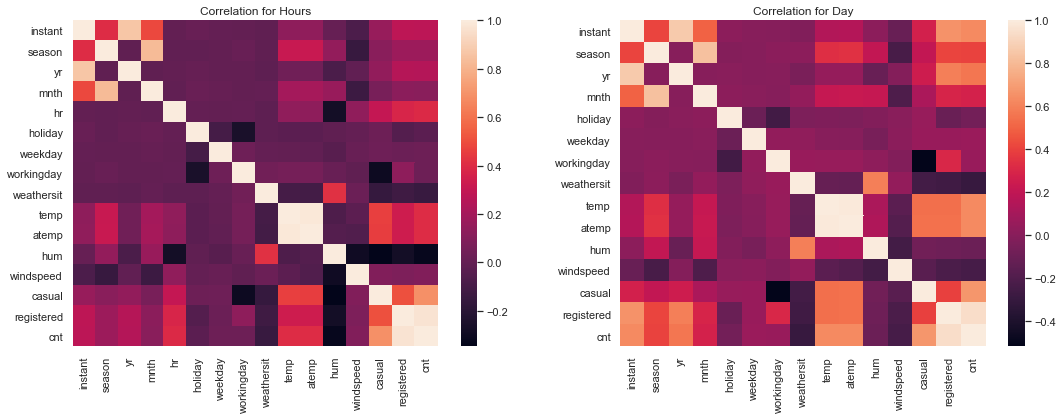

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(18, 6))
g = sns.heatmap(df_hour.corr(), ax=axs[0], )
h = sns.heatmap(df_day.corr(), ax=axs[1])

_ = g.set_title('Correlation for Hours')
_ = h.set_title('Correlation for Day')

Temperature change in 2011 vs 2012

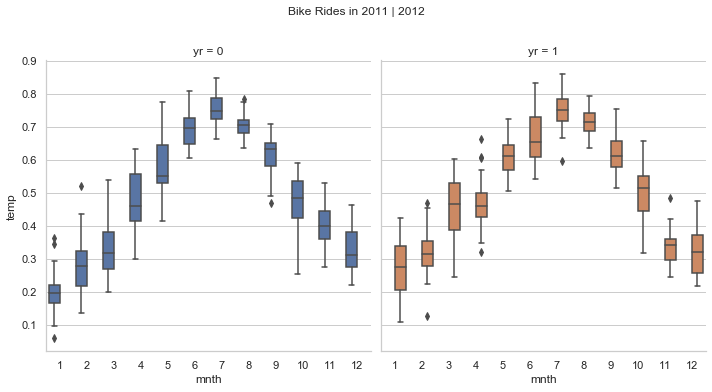

In [24]:
g = sns.catplot(x="mnth", y="temp", col="yr", data=df_day, legend=True, hue='yr', kind='box')
_ = g.fig.suptitle("Bike Rides in 2011 | 2012", y=1.08)

Distribution of Casual and Registered Rides in 2011 (0) compared with 2012 (1)

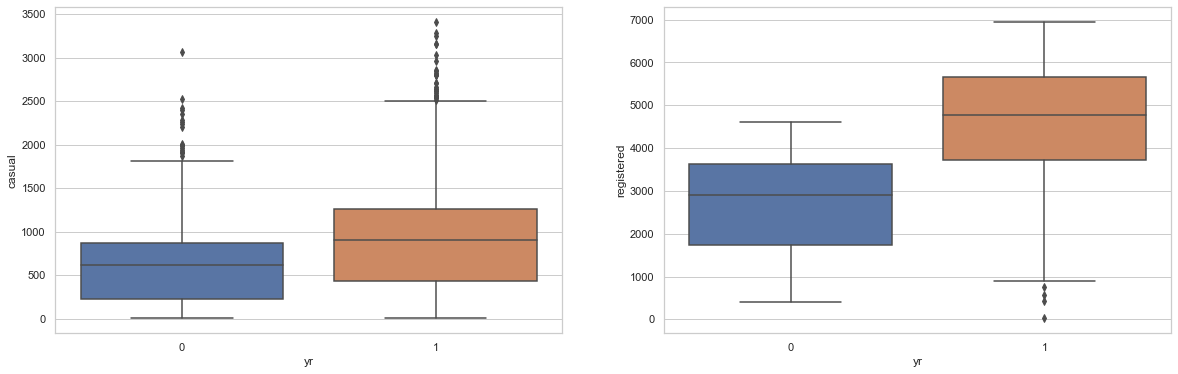

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
_ = sns.boxplot(x=df_day['yr'], y=df_day['casual'], ax=axs[0])
_ = sns.boxplot(x=df_day.yr, y=df_day.registered, ax=axs[1])

Assessing the months individually, let's look at how each day looks like.

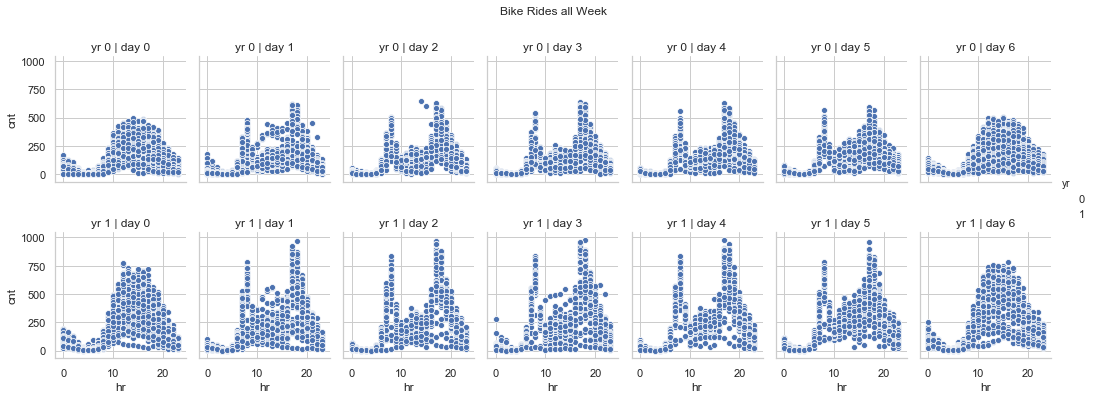

In [12]:
def scatter(x,y, **kwargs):
    sns.scatterplot(x, y)

g = sns.FacetGrid(df_hour, col='weekday', row='yr', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides all Week", y=1.08)
_ = g.set_titles(row_template = 'yr {row_name}', col_template = 'day {col_name}')
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

Starting on Sunday (first graph) to Saturday (last graph), two trends can be seen. 
The first trend is the sine-like pattern on the weekends, and the sawtooth pattern on the weekdays. The former signifies continued use of the services all through the day while the latter symbolizes a relapse in bike usage.

Peak hours for cycling occurs around 2pm (15) to 8pm (20). This is understandable as work closes around this time. A second peak occurs between 6am (5) to 10am (10) on Mondays to Friday. This peak is also synonymous with the start of work.

A second trend is the change in peak values spread across the week with Monday and Friday maxing out nearly 200 rides below Tuesday through to Saturday. 

Let's see distribution of riders per week.
#### Casual

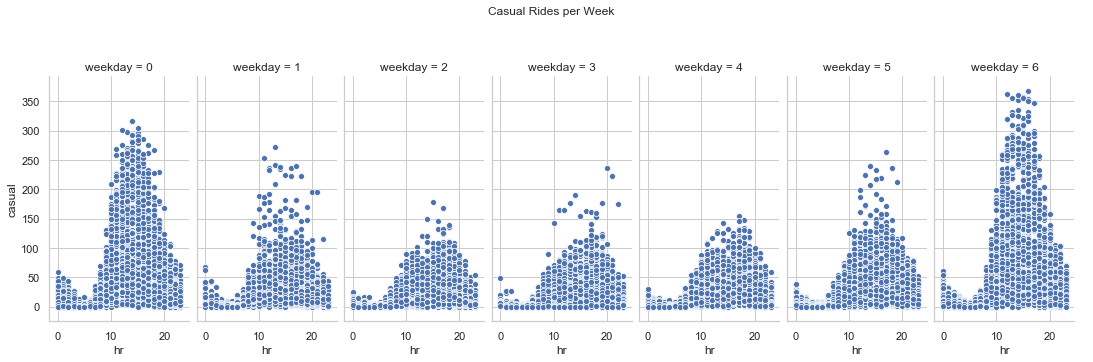

In [27]:
g = sns.FacetGrid(df_hour, col='weekday', aspect=1,)
_ = g.map(scatter, "hr", "casual")
_ = g.add_legend()
_ = g.fig.suptitle("Casual Rides per Week", y=1.08)
_ = g.fig.set_size_inches(15,5)

#### Registered

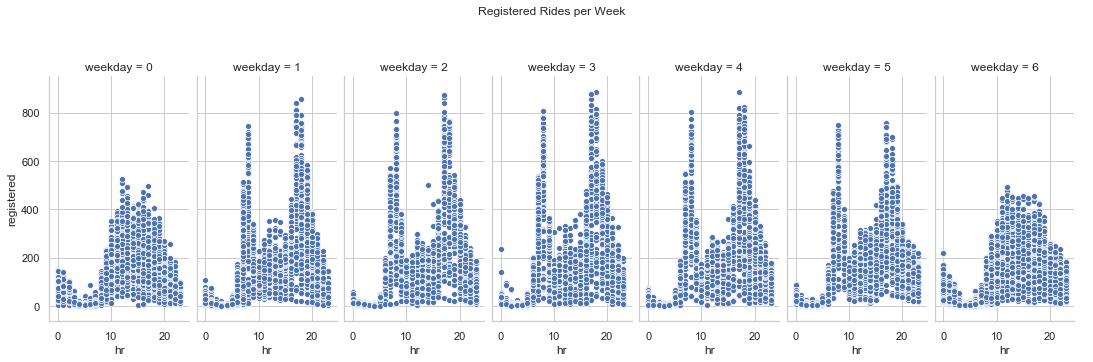

In [28]:
g = sns.FacetGrid(df_hour, col='weekday', aspect=1)
_ = g.map(scatter, "hr", "registered")
_ = g.add_legend()
_ = g.fig.suptitle("Registered Rides per Week", y=1.08)
_ = g.fig.set_size_inches(15,5)

From these two distributions, it can be seen that casual riders contribute the most on Sunday and Saturday. Also from the wave like pattern peaking around 3pm (15) it can be seen that these riders cycle for extended periods of time before closing up for the day from around 5pm (17).

Registered users on the other hand seem to peak out following a 9-5 workday pattern with major activity peaking at 9am (9) and 5pm (17). It is therefore safe to infer that these riders, to a large extent, are composed of employees.

Let's take a look at the different days in December of both years.
### December

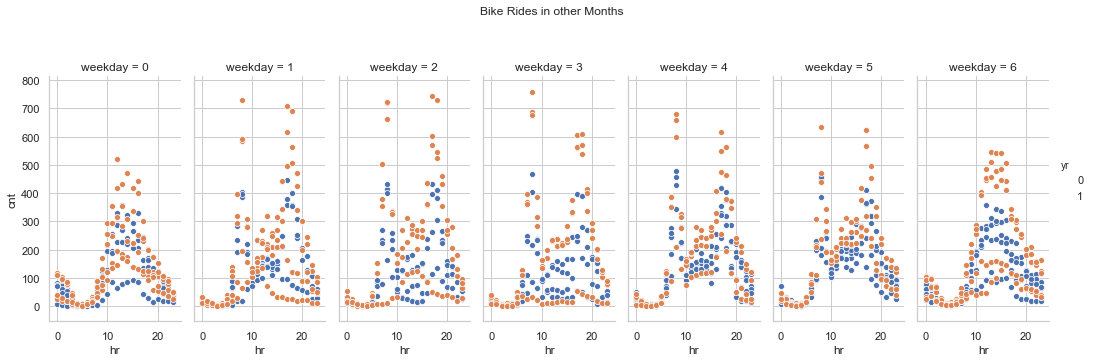

In [29]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==12)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in other Months", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

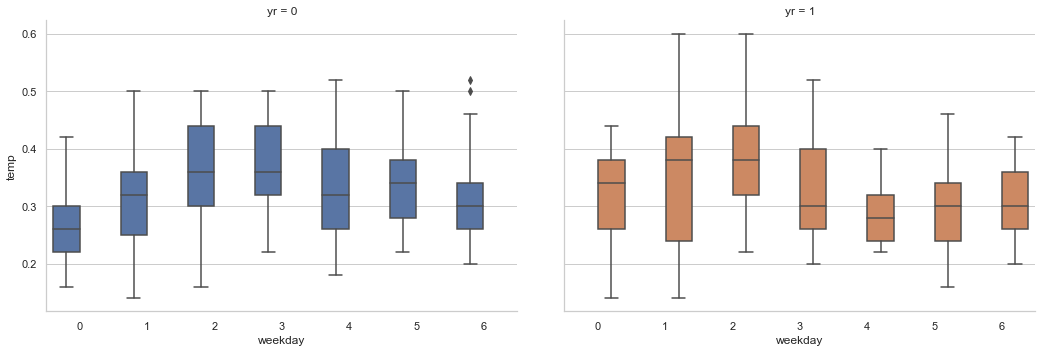

In [30]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==12],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

The same pattern seems to be repeated across both years. Turns out the slightly colder winter of December 2012 didn't slow down the increment as anticipated.

### January

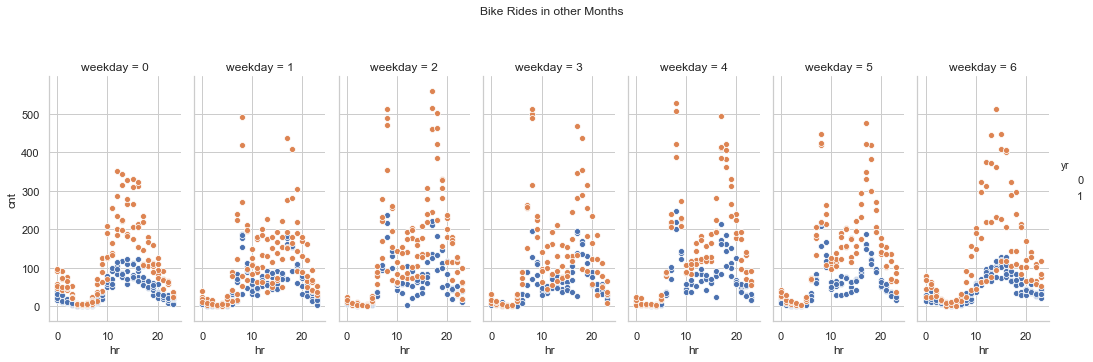

In [31]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==1)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in other Months", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

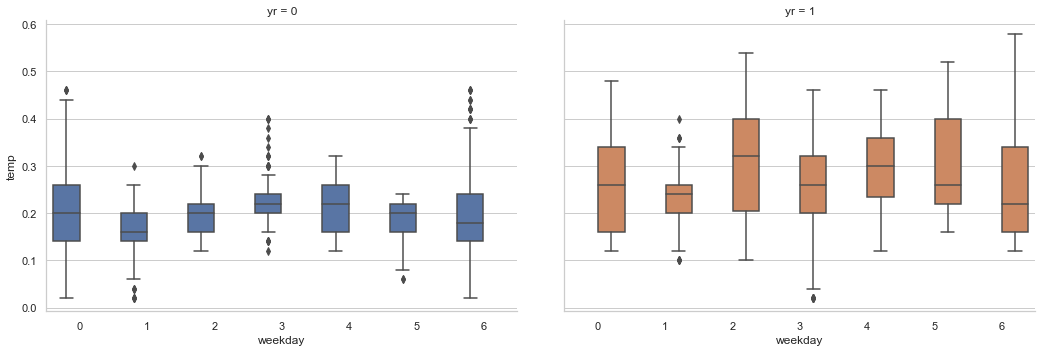

In [32]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==1],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

### February

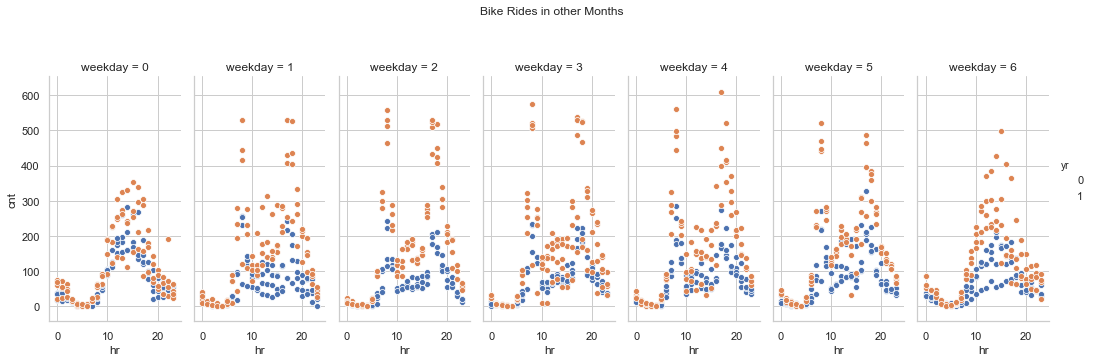

In [33]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==2)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in other Months", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

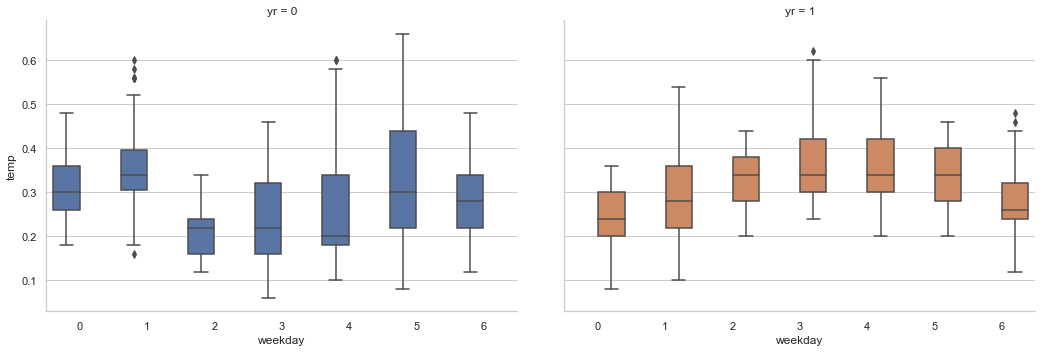

In [34]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==2],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

We'd expect more rides in 2012 given the warmer temperature as displayed by the dataset.

### March

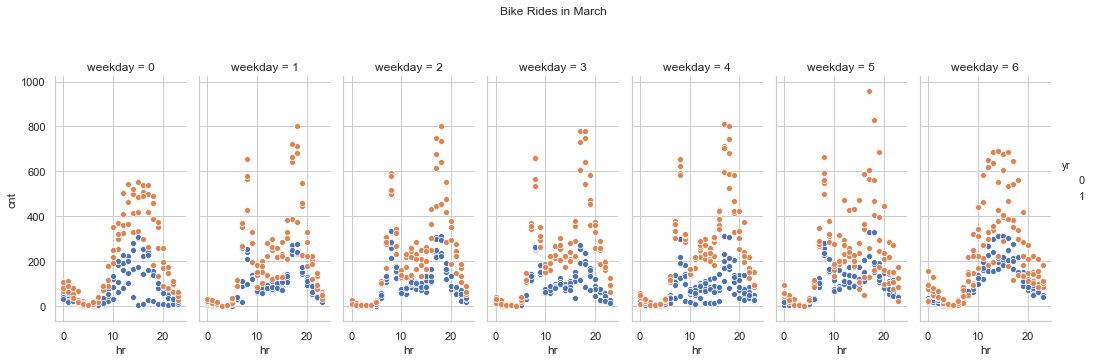

In [35]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==3)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in March", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

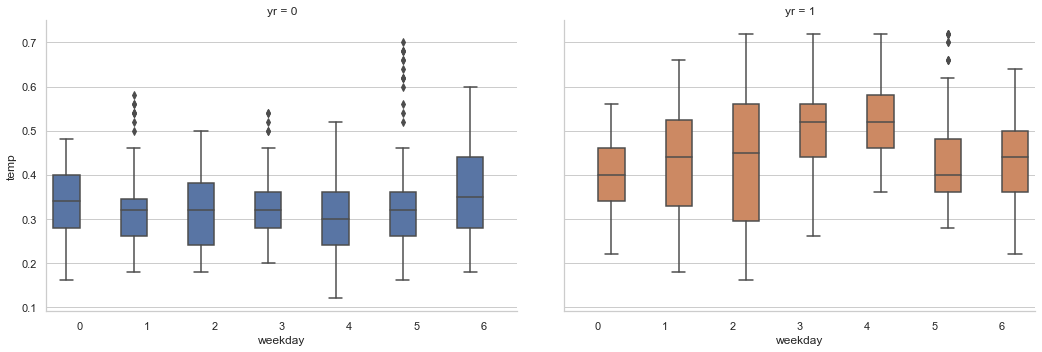

In [36]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==3],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

Again, we'd expect more rides in 2012 given the warmer temperature as displayed by the dataset.

### April

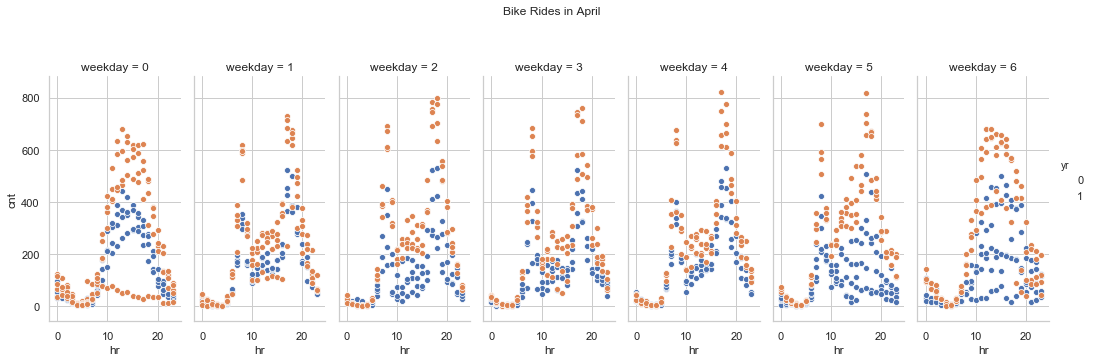

In [37]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==4)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in April", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

We notice an anomaly on Sunday were less people used the service as is normal. After brief research, it seems a forecast had gone forth predict heavy snowfall in parts of the US on Sunday the 22nd of April. However, Washington DC didn't experience the blizard as predicted. This could have had an impact on riders decisions to get on a bike that day.

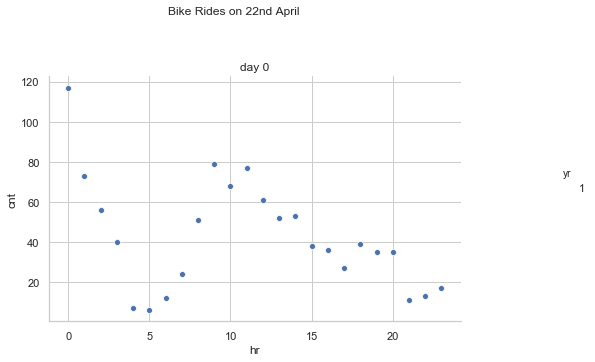

In [38]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==4)&(df_hour.dteday == '2012-04-22')], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides on 22nd April", y=1.08)
_ = g.set_titles(row_template = 'yr {row_name}', col_template = 'day {col_name}')
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(10,5)

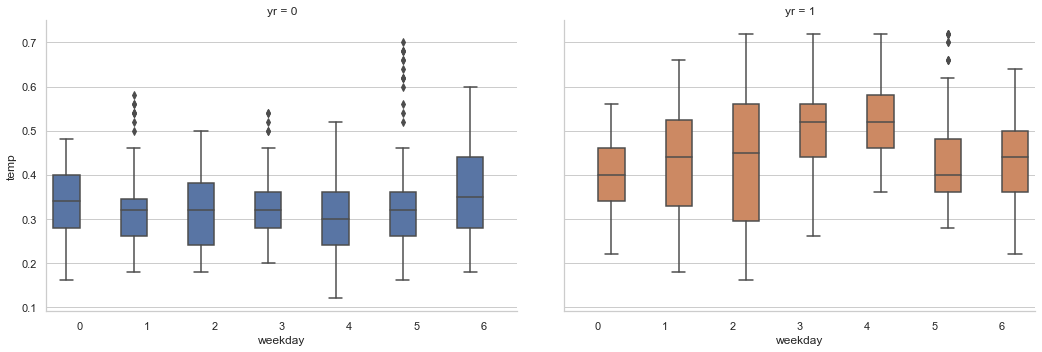

In [39]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==3],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

### May

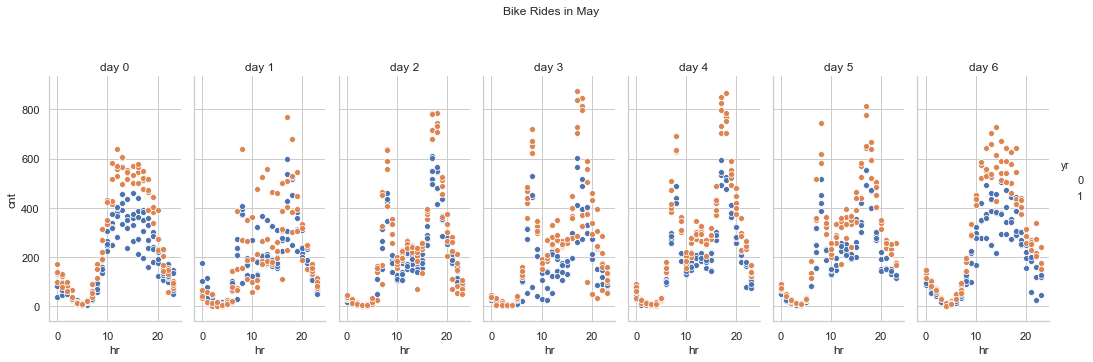

In [40]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==5)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in May", y=1.08)
_ = g.set_titles(row_template = 'yr {row_name}', col_template = 'day {col_name}')
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

Looking at Mondays in May 2012, the 9-5 pattern seems to be boycotted. A brief inquiry in the different Mondays reveal a Federal holiday, Memorial Day, on the 28th of the month. Zooming into the exact day:

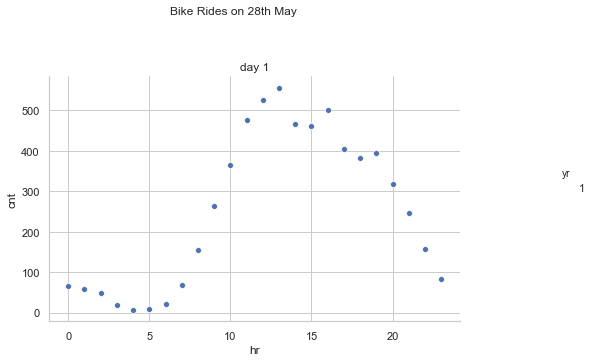

In [41]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==5)&(df_hour.dteday == '2012-05-28')], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides on 28th May", y=1.08)
_ = g.set_titles(row_template = 'yr {row_name}', col_template = 'day {col_name}')
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(10,5)

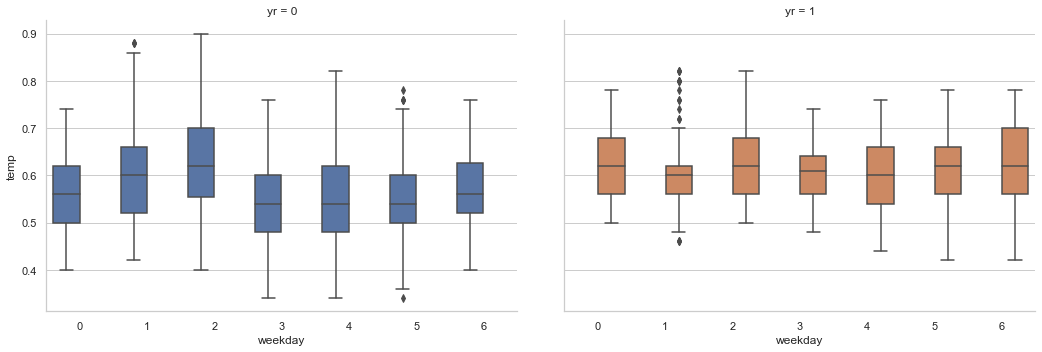

In [42]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==5],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

### June

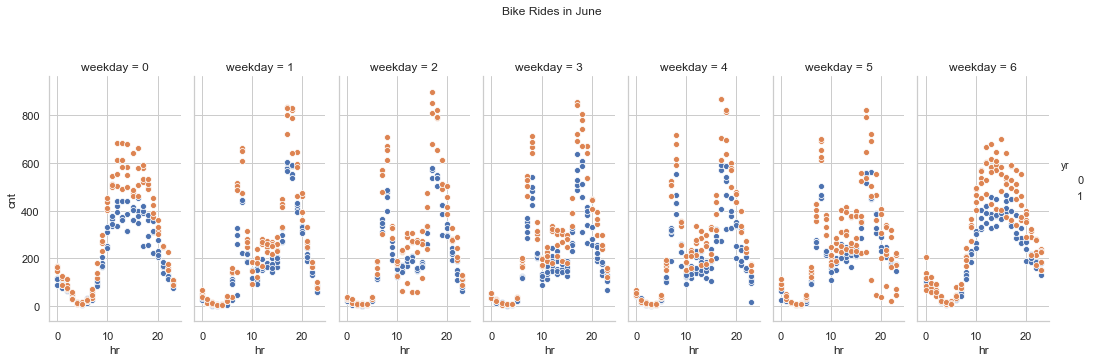

In [43]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==6)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in June", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

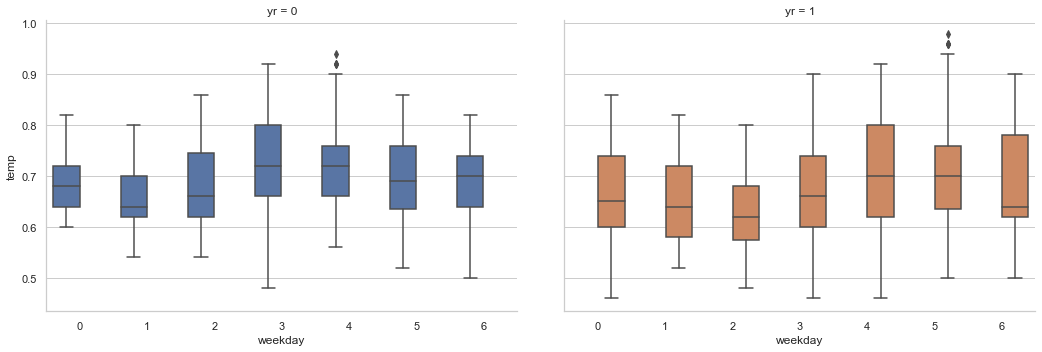

In [44]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==6],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

### July

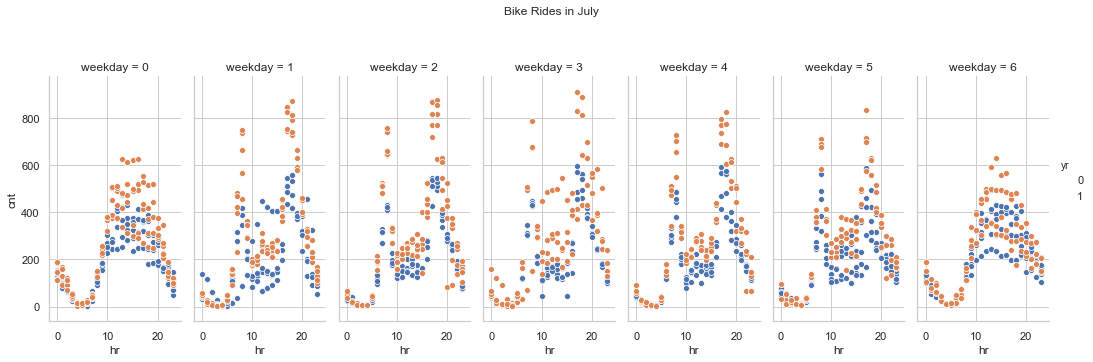

In [45]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==7)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in July", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

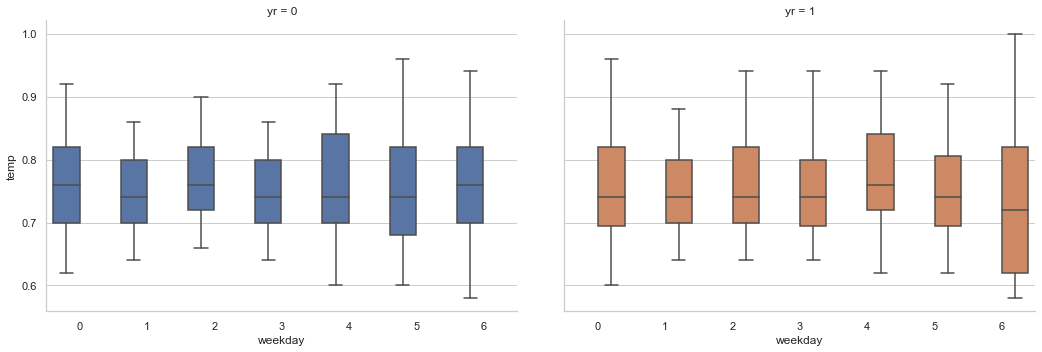

In [46]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==7],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

### August

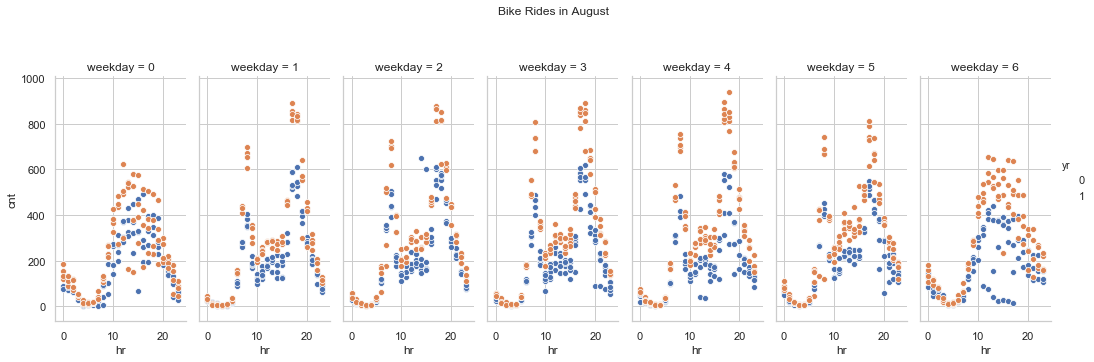

In [47]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==8)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in August", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

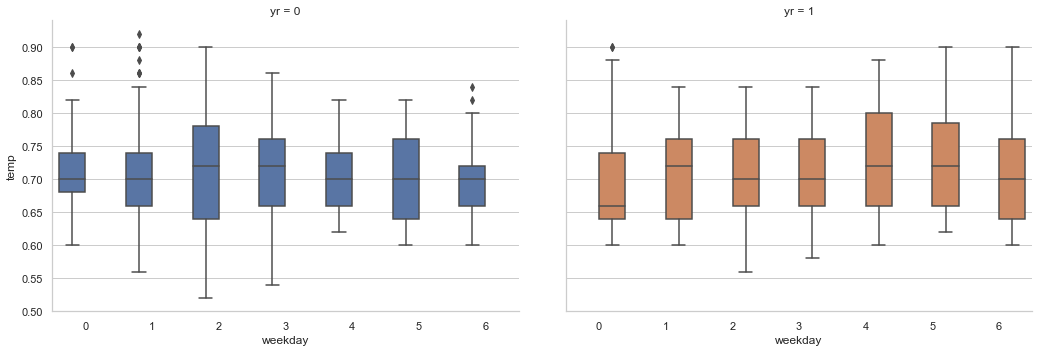

In [48]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==8],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

### September

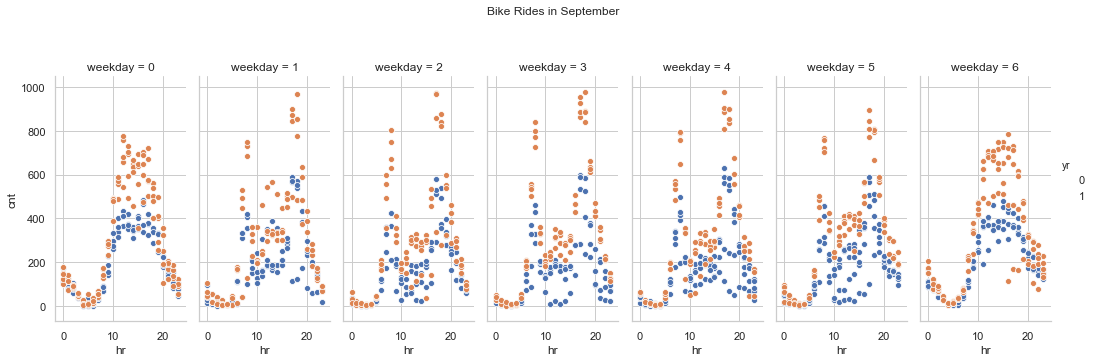

In [49]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==9)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in September", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

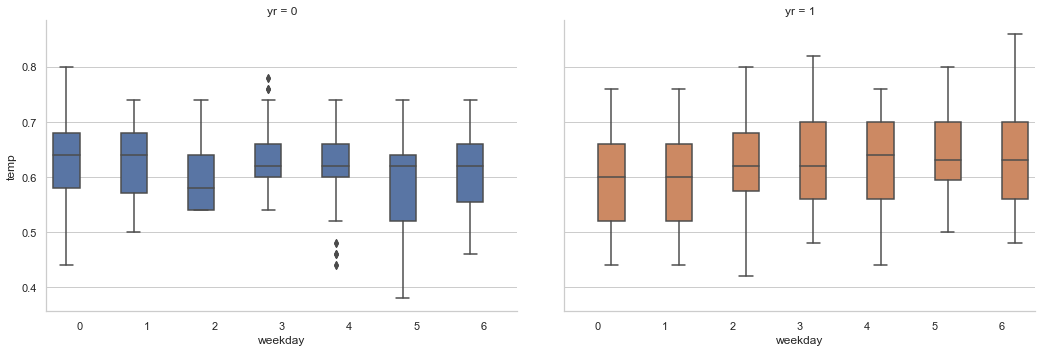

In [50]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==9],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

### October

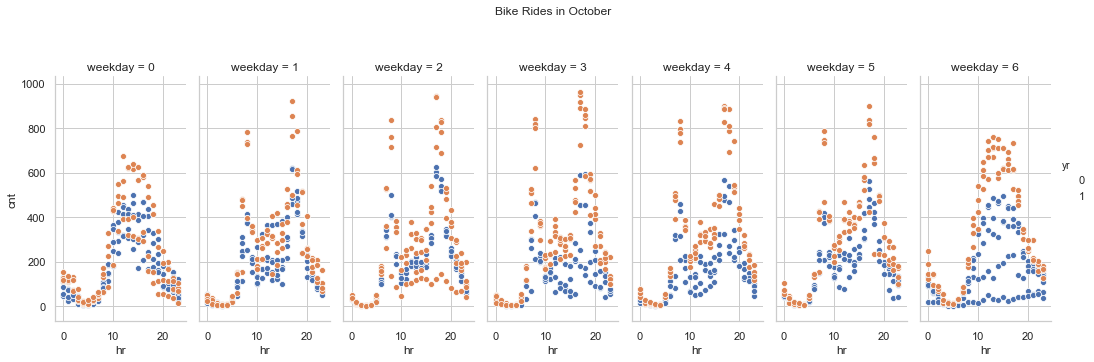

In [51]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==10)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in October", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

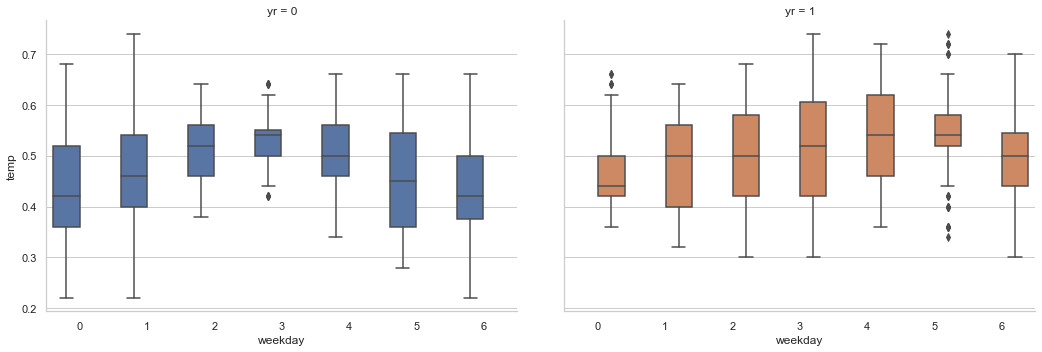

In [52]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==10],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

### November

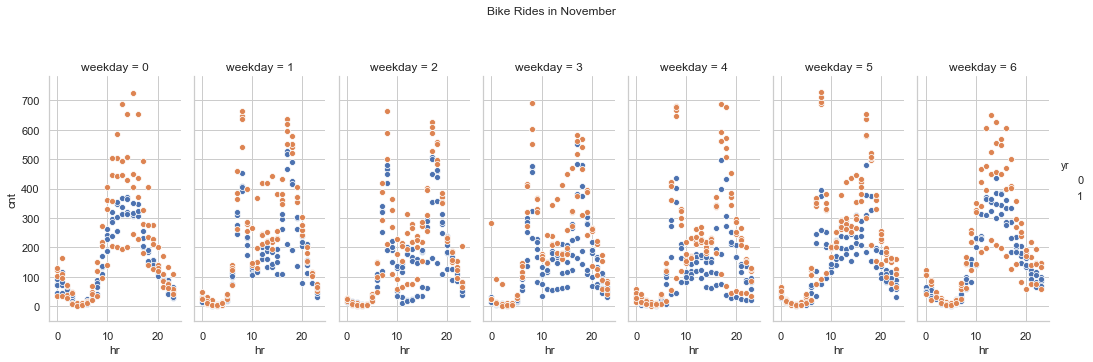

In [53]:
g = sns.FacetGrid(df_hour[(df_hour['mnth']==11)], col='weekday', hue='yr', aspect=1)
_ = g.map(scatter, "hr", "cnt")
_ = g.add_legend()
_ = g.fig.suptitle("Bike Rides in November", y=1.08)
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5)

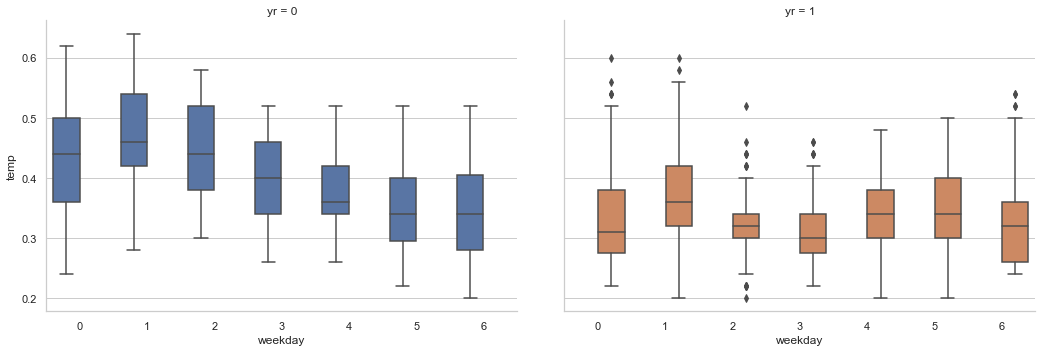

In [54]:
g = sns.catplot(x='weekday', y='temp', col='yr', data=df_hour[df_hour['mnth']==11],kind='box', hue='yr')
plt.subplots_adjust(wspace=0.1)
_ = g.fig.set_size_inches(15,5)

From this temperature plot, we can see that November 2012 was much colder than that of the previous year. That explains why the ride of 2011 was able to match those recorded in 2012 despite the series of expansions performed that year. 

It can also be inferred that visiblity affects the rate of bicycle usage in the city. From the above distributions, we can see a steady decent in rides as the sun sets and a somewhat shart accent with sunrise.  

Plotting graphs of weather conditions that generally affect visibility:

1. Clear (Great Visible)
2. Slightly Cloudy (Good Visibility)
3. Light Snow/Rain (Fair visibility)
4. Thunderstorm (Impaired Visibility)

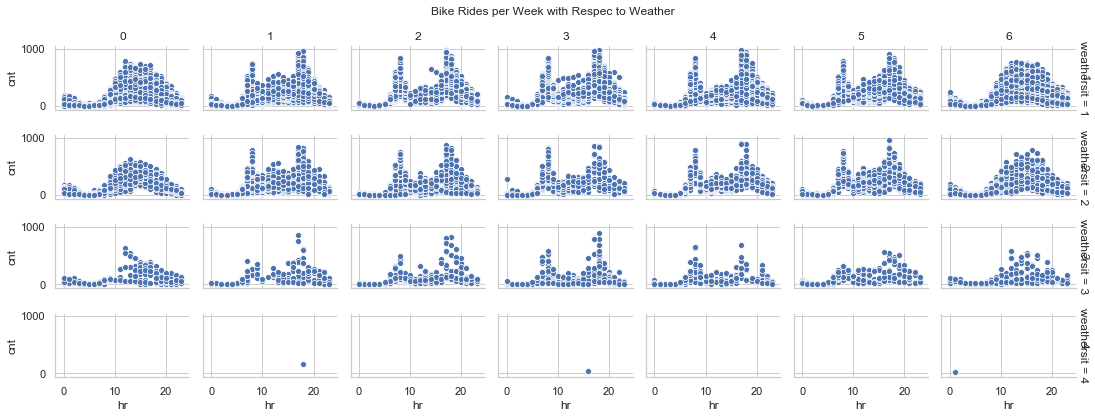

In [55]:
g = sns.FacetGrid(df_hour, col='weekday', row='weathersit', aspect=1, margin_titles=True)
_ = g.map(scatter, "hr", "cnt")
_ = g.fig.suptitle("Bike Rides per Week with Respec to Weather", y=1.08)
_ = g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.subplots_adjust(hspace=0.4, wspace=0.1)
_ = g.fig.set_size_inches(15,5,)

From these graphs, we can tell that bicycle usage and negatively correlated with visibilty. This is expected given the dangers of using a riding a bike in weather situations that impair visibility.

## Predictive Modelling

### 1. Count of Rides per Day

Splitting columns

In [144]:
X = df_day.drop(columns=['cnt', 'casual', 'registered', 'dteday'])

In [145]:
y = df_day['cnt']

Standardizing the dataset

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Splitting the dataset

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Training

In [148]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
_ = regression.fit(X_train, y_train)

Prediction

In [149]:
y_pred = regression.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
80,2703,3342.171292
97,1471,2088.653442
558,7446,7338.600587
406,2169,2215.134740
124,4433,3484.714341
724,1013,2565.485439
126,4714,4151.493418
216,4866,5252.128080
177,4708,4338.669800
346,3523,3475.804365


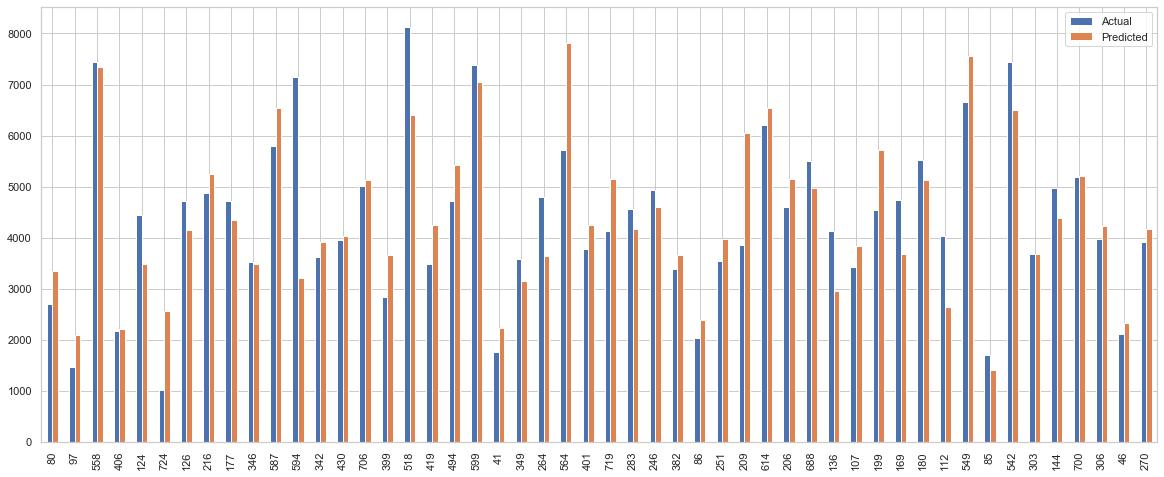

In [150]:
df.head(50).plot(kind='bar', figsize=(20,8))

Metrics

In [151]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

682.6739774270179

In [152]:
metrics.mean_squared_error(y_test, y_pred)

812256.0947769805

In [153]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

901.2525144358714

### 2. Detect Weather Anomaly

Splitting columns

In [167]:
X1 = df_day.drop(columns=['weathersit', 'dteday', 'yr', 'instant'])

In [168]:
y1 = df_day['weathersit']

Splitting Dataset

In [169]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=1)

Training

In [170]:
from sklearn import tree
dsTree = tree.DecisionTreeClassifier()
_ = dsTree.fit(X1_train, y1_train)

In [171]:
from sklearn import ensemble
rfClf = ensemble.RandomForestClassifier()
_ = rfClf.fit(X1_train, y1_train)

In [172]:
gbClf = ensemble.GradientBoostingClassifier()
_ = gbClf.fit(X1_train, y1_train)

Prediction

- Decision Tree

In [173]:
ds_pred = dsTree.predict(X1_test)

In [174]:
ds_accuracy = metrics.accuracy_score(y1_test, ds_pred)
ds_accuracy

0.7213114754098361

- Random Forest

In [175]:
rf_pred = rfClf.predict(X1_test)

In [176]:
rf_accuracy = metrics.accuracy_score(y1_test, rf_pred)
rf_accuracy

0.8032786885245902

- Gradient Boosting

In [177]:
gb_pred = gbClf.predict(X1_test)

In [178]:
gb_accuracy = metrics.accuracy_score(y1_test, rf_pred)
gb_accuracy

0.8032786885245902

The goal of this project is to predict whether a customer will be a weather anomaly that may impede cycling at a particular time. A false positive prediction will hurt the business more than a false negative one. How? If the business predicts abnormal weather at a certain time and makes preparation by reducing availability of bicycles at the time (to protect them against bad weather), the business would lose greatly if the bad weather prediction turns out to be negative.

Hence our aim would be to minimize false positives. 

A good metrics for success would be Precision.

Let's see how our models did on Precision

In [179]:
from sklearn.metrics import classification_report
print('.....Decision Tree Classification Report......')
print(classification_report(y1_test, ds_pred))
print('.....Random Forest Classification Report......')
print(classification_report(y1_test, rf_pred))
print('.....Gradient Boosting Classification Report......')
print(classification_report(y1_test, gb_pred))

.....Decision Tree Classification Report......
              precision    recall  f1-score   support

           1       0.77      0.81      0.79       113
           2       0.63      0.58      0.60        66
           3       0.67      0.50      0.57         4

    accuracy                           0.72       183
   macro avg       0.69      0.63      0.65       183
weighted avg       0.72      0.72      0.72       183

.....Random Forest Classification Report......
              precision    recall  f1-score   support

           1       0.78      0.96      0.86       113
           2       0.86      0.56      0.68        66
           3       1.00      0.50      0.67         4

    accuracy                           0.80       183
   macro avg       0.88      0.67      0.74       183
weighted avg       0.82      0.80      0.79       183

.....Gradient Boosting Classification Report......
              precision    recall  f1-score   support

           1       0.78      0.88     